# 1) Kitaev clusters

The Hamiltonian 
\begin{equation}
    H = -\sum\limits_{i,j,\alpha} J_{ij^\alpha} S_i^\alpha S_j^\alpha,
\end{equation}
($i\neq j=1,\dots,N,\, \alpha=x,y,z$) with each spin of the cluster connected to exaclty three different spins with different couplings ($x,y,z$).

Let the couplings be $J=1$ (ferromagnetic case).

## a) Eigenenergies for $N=6$
For $N=6$, there are two different Kitaev clusters.

<img src="1a.png" width="600px" />

The corresponding couplings are

In [2]:
include("hamilton_spins.jl") # functions to calculate the Hamilton matrix

calculate_hamilton_matrix (generic function with 1 method)

### cluster (a)

In [251]:
N = 6
J = 1

Js_N6_a = reset_Js(N)

# x links
Js_N6_a[1][1,4] = J
Js_N6_a[1][2,3] = J
Js_N6_a[1][5,6] = J
# y links
Js_N6_a[2][1,2] = J
Js_N6_a[2][3,6] = J
Js_N6_a[2][4,5] = J
# z links
Js_N6_a[3][1,3] = J
Js_N6_a[3][2,5] = J
Js_N6_a[3][4,6] = J
;

In [15]:
H_N6_a = calculate_hamilton_matrix(Js_N6_a, N);

In [19]:
using SymPy

In [186]:
ψ_N6_a = eigvecs(rationalize.(Matrix(H_N6_a)))
E_N6_a = unique(round.(eigvals(rationalize.(Matrix(H_N6_a))); digits=10))

11-element Vector{Float64}:
 -1.1568032513
 -1.0307764064
 -0.75
 -0.6160254038
 -0.25
 -0.0146582901
  0.25
  0.9214615414
  1.0307764064
  1.1160254038
  1.25

In [214]:
counter_N6_a = zeros(Int, 11)
for j in 1:64
    for i in 1:11
        if H_N6_a * ψ_N6_a[:,j] ≈ E_N6_a[i] * ψ_N6_a[:,j]
            #println("j=$j: $i")
            counter_N6_a[i] += 1
        end
    end
end
@assert sum(counter_N6_a) == 2^N
counter_N6_a

11-element Vector{Int64}:
  6
  6
  4
  2
 10
  6
 14
  6
  6
  2
  2

In [215]:
using Plots, LaTeXStrings

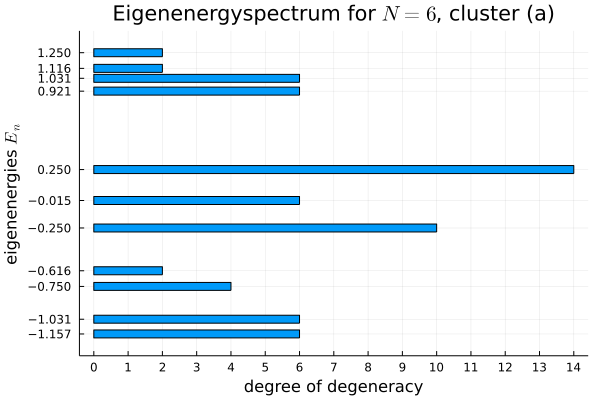

In [594]:
bar(E_N6_a, counter_N6_a, orientation=:h, label=false)
yticks!(round.(E_N6_a; digits=3))
xticks!(0:14)
xlabel!("degree of degeneracy")
ylabel!("eigenenergies " * L"E_n")
title!("Eigenenergyspectrum for " *L"N=6" * ", cluster (a)")

In [595]:
savefig("1a-N6_a.png")

### cluster (b)

In [207]:
N = 6
J = 1

Js_N6_b = reset_Js(N)

# x links
Js_N6_b[1][1,6] = J
Js_N6_b[1][2,5] = J
Js_N6_b[1][3,4] = J
# y links
Js_N6_b[2][1,4] = J
Js_N6_b[2][2,3] = J
Js_N6_b[2][5,6] = J
# z links
Js_N6_b[3][1,2] = J
Js_N6_b[3][3,6] = J
Js_N6_b[3][4,5] = J
;

In [208]:
H_N6_b = calculate_hamilton_matrix(Js_N6_b, N);

In [235]:
ψ_N6_b = eigvecs(rationalize.(Matrix(H_N6_b)))
E_N6_b = unique(round.(eigvals(rationalize.(Matrix(H_N6_b))); digits=7))

8-element Vector{Float64}:
 -1.25
 -1.0307764
 -0.75
 -0.25
  0.25
  0.75
  1.0307764
  1.25

In [236]:
counter_N6_b = zeros(Int, 8)
for j in 1:64
    for i in 1:8
        if H_N6_b * ψ_N6_b[:,j] ≈ E_N6_b[i] * ψ_N6_b[:,j]
            #println("j=$j: $i")
            counter_N6_b[i] += 1
        end
    end
end
@assert sum(counter_N6_b) == 2^N
counter_N6_b

8-element Vector{Int64}:
  3
  9
  5
 15
 15
  5
  9
  3

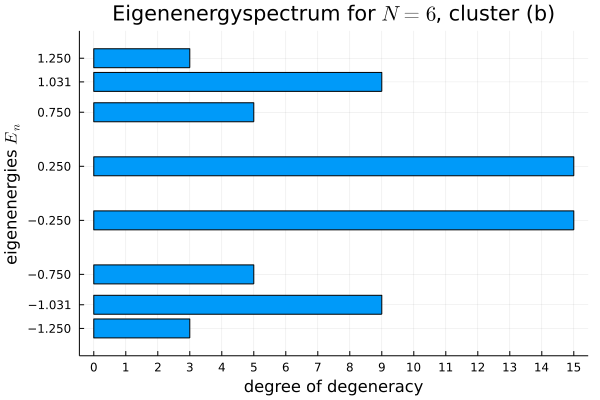

In [596]:
bar(E_N6_b, counter_N6_b, orientation=:h, label=false)
yticks!(round.(E_N6_b; digits=3))
xticks!(0:15)
xlabel!("degree of degeneracy")
ylabel!("eigenenergies " * L"E_n")
title!("Eigenenergyspectrum for " *L"N=6" * ", cluster (b)")

In [597]:
savefig("1a-N6_b.png")

## b) Spin-correlations for the Kitaev cube ($N=8$)
a few of the Kitaev clusters for $N=8$ can be visualized as cubes, e.g.
<img src="1b.png" width="300px"/>

In [598]:
N = 8
J = 1

Js_N8 = reset_Js(N)

# x links
Js_N8[1][1,4] = J
Js_N8[1][2,3] = J
Js_N8[1][5,8] = J
Js_N8[1][6,7] = J
# y links
Js_N8[2][1,2] = J
Js_N8[2][3,4] = J
Js_N8[2][5,6] = J
Js_N8[2][7,8] = J
# z links
Js_N8[3][1,5] = J
Js_N8[3][2,6] = J
Js_N8[3][3,7] = J
Js_N8[3][4,8] = J
;

In [254]:
H_N8 = calculate_hamilton_matrix(Js_N8, N);

In [324]:
ψ_N8 = eigvecs(rationalize.(Matrix(H_N8)))
E_N8 = unique(round.(eigvals(rationalize.(Matrix(H_N8))); digits=7));

In [329]:
E_N8_g = E_N8[1]
ψ_N8_g = ψ_N8[:,1]

@assert H_N8 * ψ_N8_g ≈ E_N8_g * ψ_N8_g

### Calculating the spin correlations

In [330]:
include("spin_correlation.jl")

spin_correlation (generic function with 1 method)

In [599]:
χs = zeros(8,8)
for n in 1:8
    for m in 1:8
        χs[n,m] = spin_correlation(N, ψ_N8_g, n,m)
    end
end

In [601]:
function are_nearest_neighbours(n,m, Js, J)
    if Js[1][n,m] == J || Js[1][m,n] == J || 
        Js[2][n,m] == J || Js[2][m,n] == J || 
        Js[3][n,m] == J || Js[3][m,n] == J
        return true
    end
    return false
end

are_nearest_neighbours (generic function with 1 method)

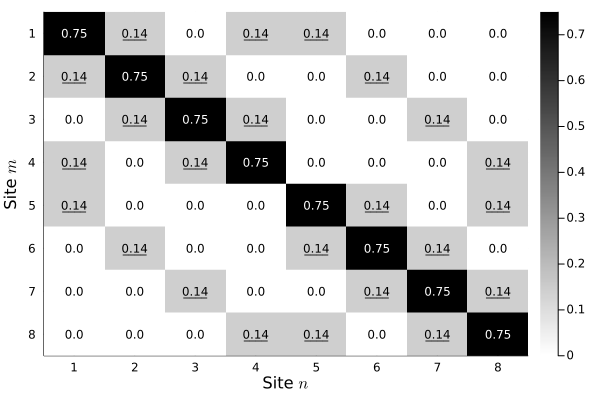

In [633]:
heatmap(round.(χs; digits=2); yflip=true, xflip=false, fill=reverse(cgrad(["black","white"])))
xticks!(1:8)
yticks!(1:8)
xlabel!("Site " * L"n")
ylabel!("Site " * L"m")

# label each cell with its value
for n in 1:8, m in 1:8
    annotate!([(
        n,
        m, 
        (
            abs(round(χs[n,m]; digits=2)), 
            (χs[n,m] <= 0.5*0.75 ? "black" : "white"),
            8,
            "Arial"
        )
    )])
    if are_nearest_neighbours(n, m, Js_N8, J) # underline only the next neighbours
        annotate!([(
            n,m,
            ("____", 8)
        )])
    end
end
plot!()

In [634]:
savefig("1b-chi.png")